In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import data_prep
import data_exploration

In [2]:
font = {'family' : 'serif',
        'size'   : 15}

plt.rc('font', **font)
plt.rc('lines', linewidth=3)
plt.rc('axes', linewidth=3)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)

In [3]:
machine_name = 'Polaris'

# Load Data (after Feature Engineering)

In [4]:
# Load the data to make sure we're using the same file as the other notebooks will use
df = data_prep.load_parse_engineered_df(machine_name)
df.head()

,JOB_NAME,COBALT_JOBID,MACHINE_NAME,QUEUED_TIMESTAMP,QUEUED_DATE_ID,START_TIMESTAMP,START_DATE_ID,END_TIMESTAMP,END_DATE_ID,USERNAME_GENID,...,DAY,MONTH,DAY_NAME,HOUR,RUNTIME_HOURS,WALLTIME_HOURS,QUEUED_WAIT_HOURS,ELIGIBLE_WAIT_HOURS,WALLTIME_RUNTIME_DIFF,ELIGIBLE_WAIT_HOURS_PREV
172386,1983946.polaris,0,polaris,2024-06-10 13:31:46,20240610,1970-01-01 00:00:00,0,2024-06-14 21:17:41,20240614,34752197486698,...,1,1,Thursday,0,477333.294722,5.166667,103.765556,103.765556,-477328.128056,NaN
172387,1983947.polaris,0,polaris,2024-06-10 13:31:48,20240610,1970-01-01 00:00:00,0,2024-06-14 21:18:30,20240614,34752197486698,...,1,1,Thursday,0,477333.308333,5.166667,103.778333,103.778333,-477328.141667,103.765556
2,314423.polaris,0,polaris,2022-07-31 21:20:58,20220731,2022-07-31 21:20:58,20220731,2022-08-01 03:22:41,20220801,18444800292348,...,31,7,Sunday,21,6.028611,6.000000,0.000000,0.000000,-0.028611,103.778333
0,314424.polaris,0,polaris,2022-08-01 01:04:53,20220801,2022-08-01 01:04:53,20220801,2022-08-01 01:36:01,20220801,30861277613258,...,1,8,Monday,1,0.518889,0.500000,0.000000,0.000000,-0.018889,0.000000
11,314425.polaris,0,polaris,2022-08-01 01:15:09,20220801,2022-08-01 01:15:09,20220801,2022-08-01 13:16:24,20220801,82525238852261,...,1,8,Monday,1,12.020833,12.000000,0.000000,0.000000,-0.020833,0.000000


# Data Filtering for Plotting

In [5]:
# Filter for only valid years
print(df.shape)
df = df[df['YEAR'].isin([2022, 2023, 2024])]
print(df.shape)

(519177, 69)
(519175, 69)


In [6]:
# Remove jobs that waited for more than 145.8 days
df=df[df['ELIGIBLE_WAIT_HOURS'] < 3500]
print(df.shape)

(519175, 69)


# Overall system utilization trend and Job Characteristics

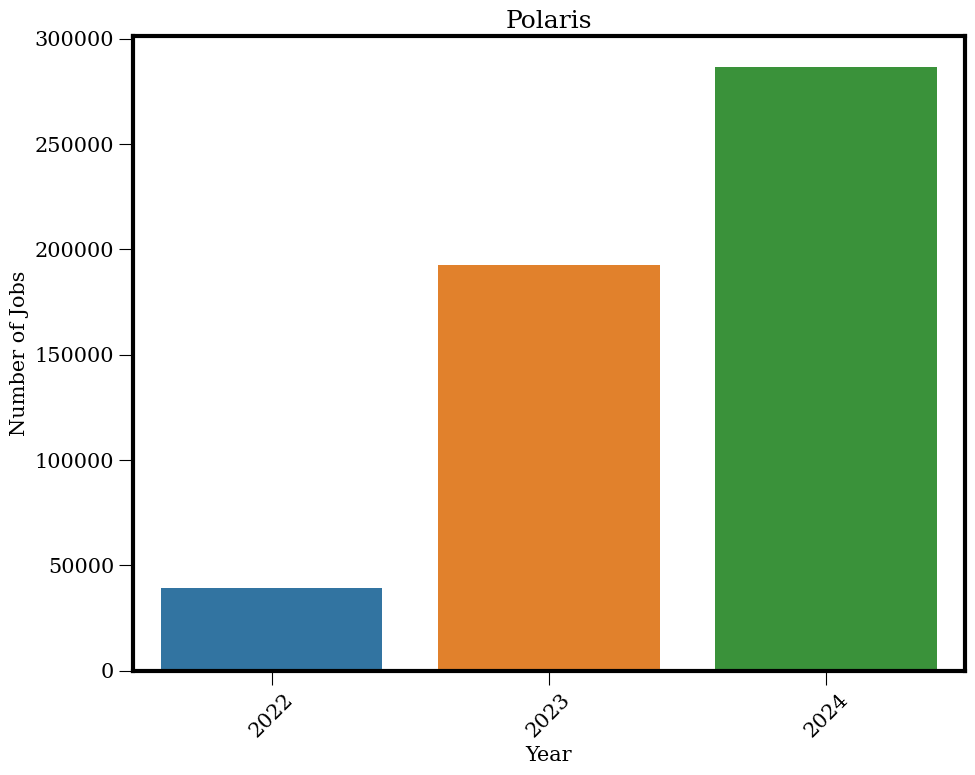

In [7]:
data_exploration.plot_jobs_per_year(df, machine_name)

In [8]:
data_exploration.stats_per_year(df)

   YEAR      mean    median        std       p25       p75
0  2022  6.191863  0.001389  31.004967  0.000000  0.007500
1  2023  4.148975  0.002778  52.598931  0.001944  0.201111
2  2024  2.523733  0.000000  18.852693  0.000000  0.003056


In [9]:
data_exploration.overall_stats(df)

Total jobs:519175
Users:1717
Projects:410


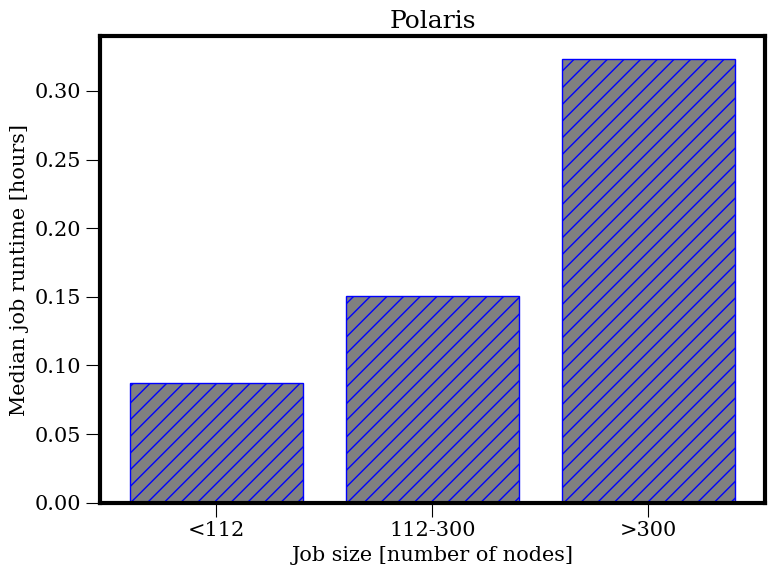

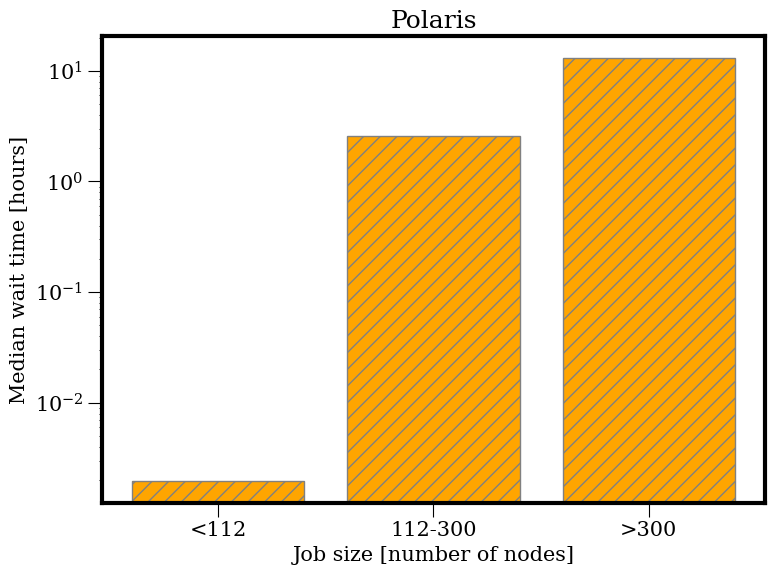

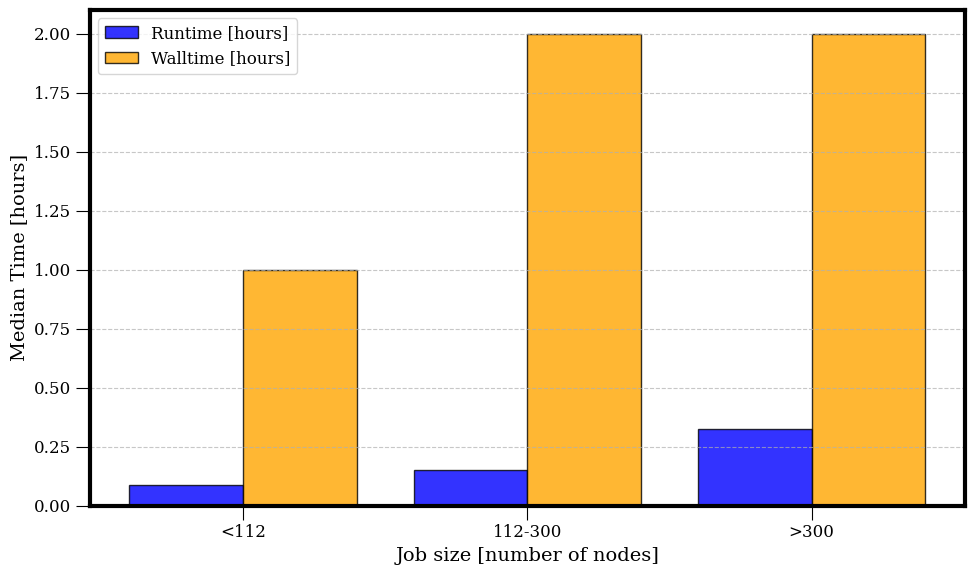

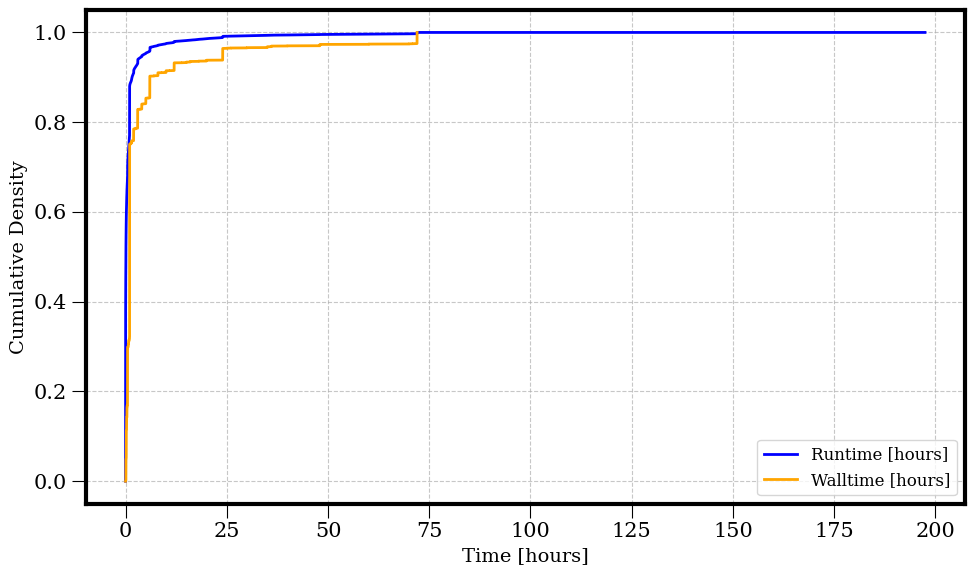

In [10]:
thresholds = [112, 300]
keys = ['<112', '112-300', '>300']
data_exploration.plot_by_job_size(df, thresholds, keys, machine_name,
                                  facecolor_runtime="gray", edgecolor_runtime="blue", hatch='//',
                                  facecolor_waittime="orange", edgecolor_waittime="gray")

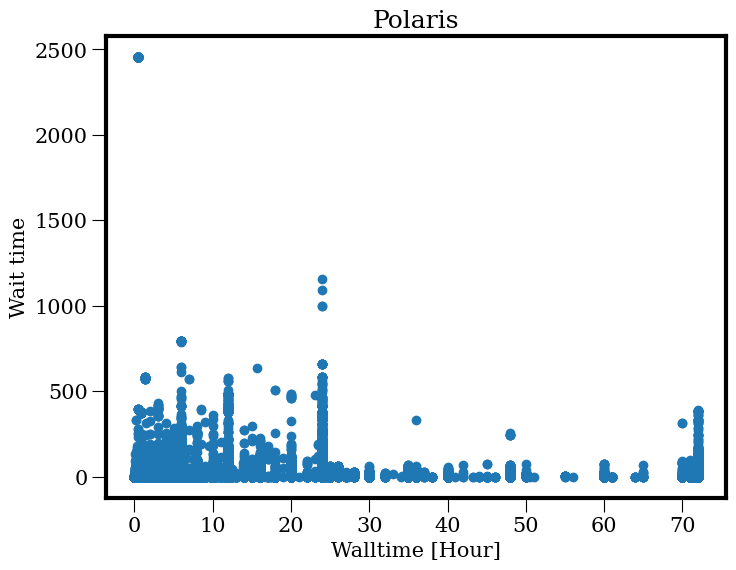

In [11]:
data_exploration.walltime_vs_waittime(df, machine_name)

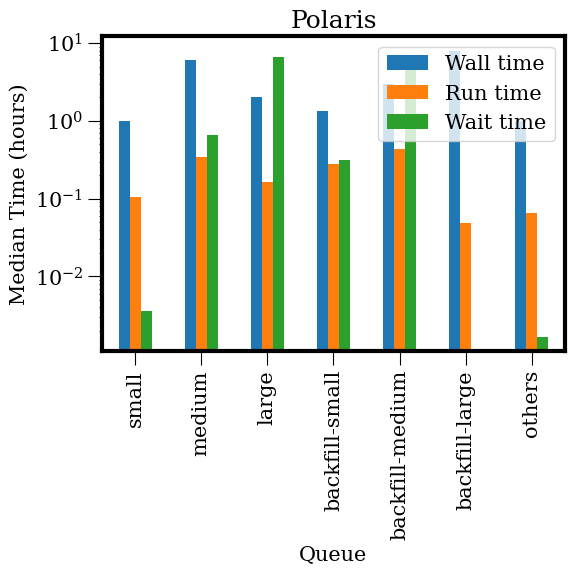

In [12]:
list_queues = ['small', 'medium', 'large', 'backfill-small', 'backfill-medium', 'backfill-large']
list_names = ['small', 'medium', 'large', 'backfill-small', 'backfill-medium', 'backfill-large', 'others']
data_exploration.get_queue_time(df, machine_name, list_queues, list_names)

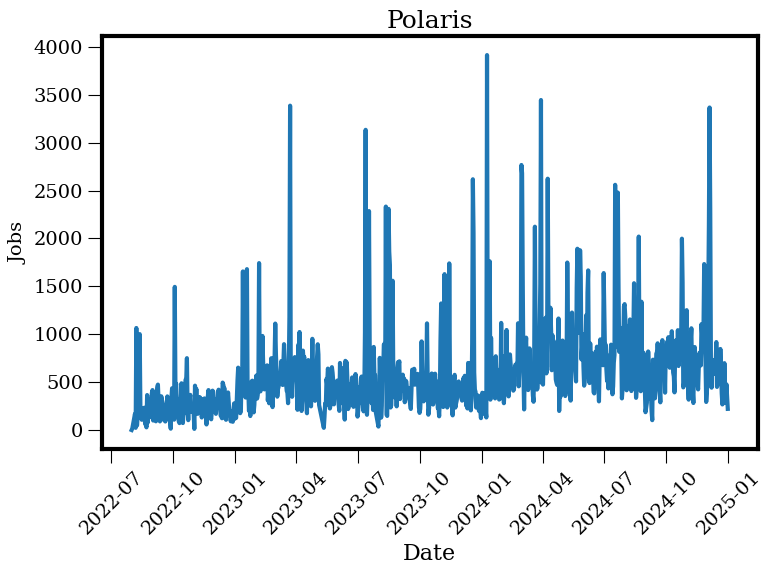

In [13]:
data_exploration.plot_events_per_day(df, machine_name)

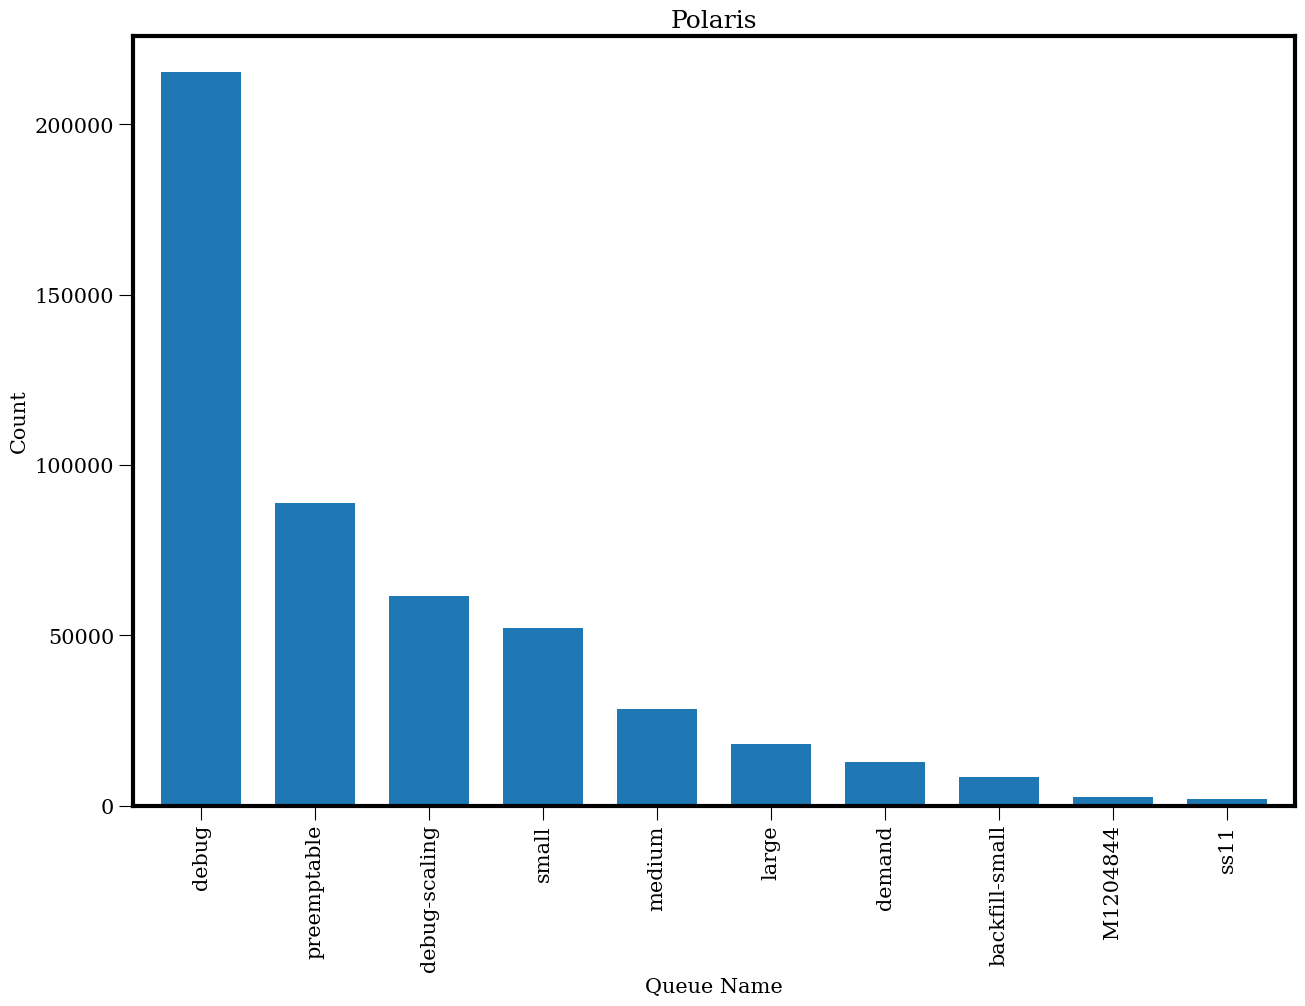

In [14]:
data_exploration.jobs_per_queue(df, machine_name)

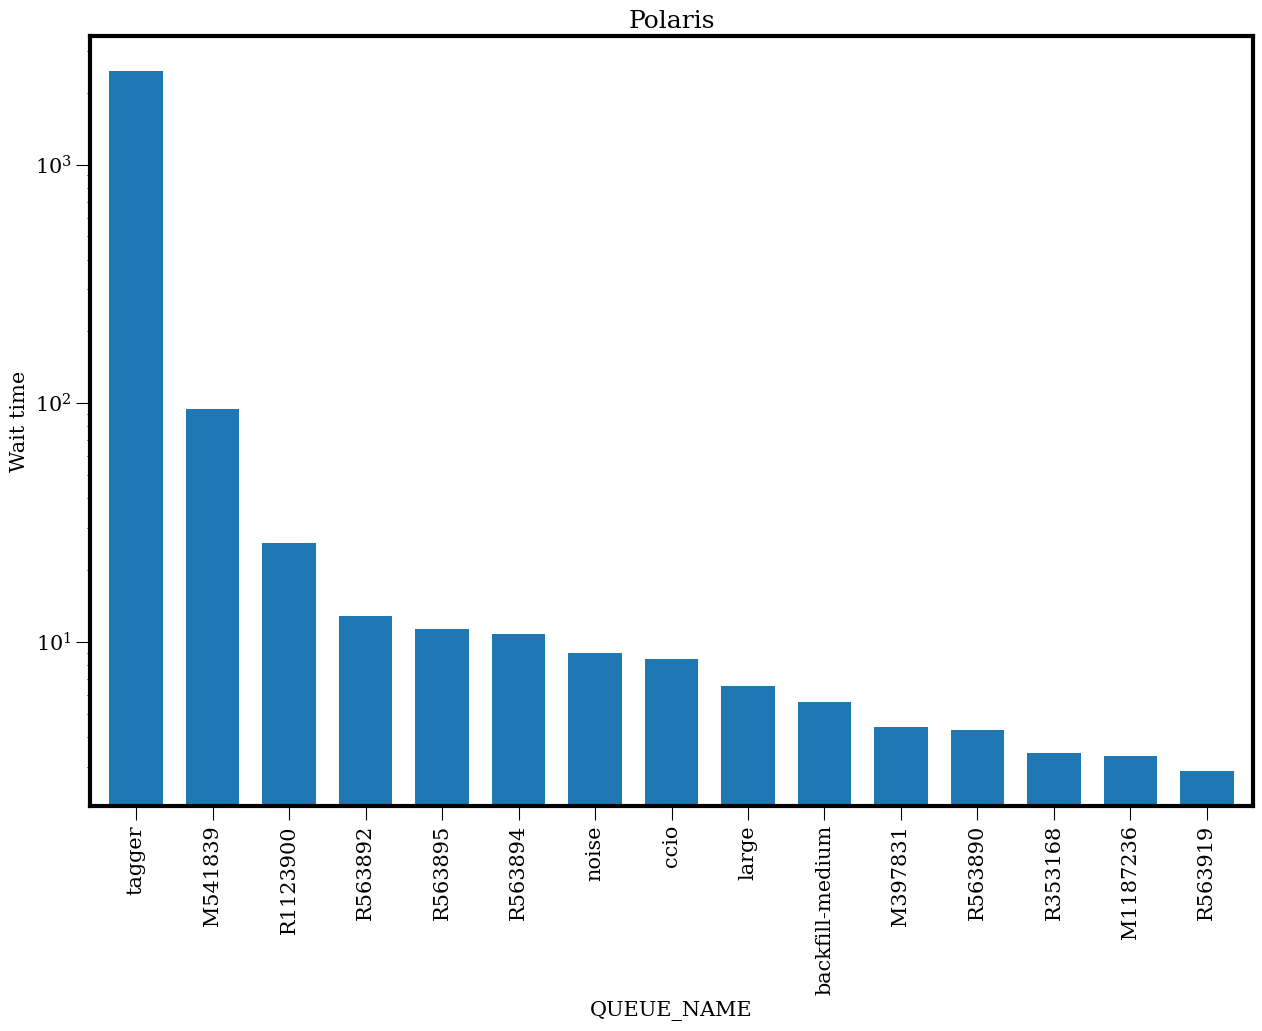

In [15]:
data_exploration.waittime_per_queue(df, machine_name)

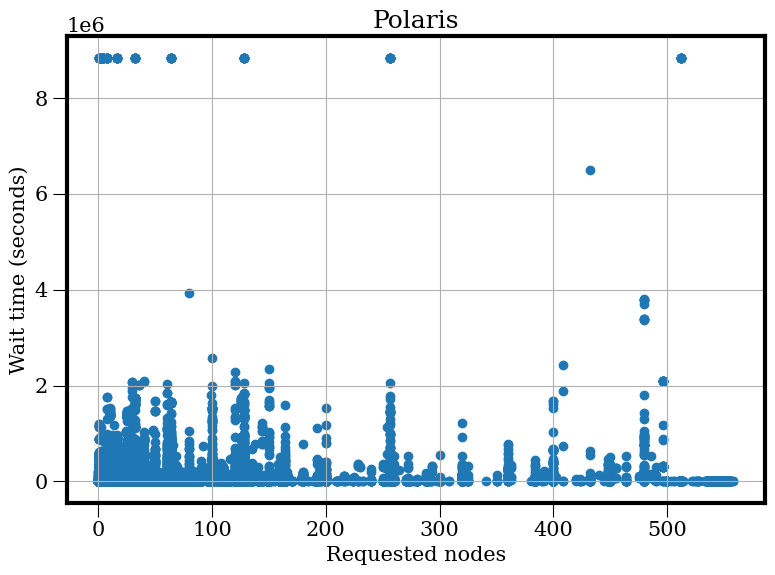

In [16]:
data_exploration.nodes_vs_waittime(df, machine_name)

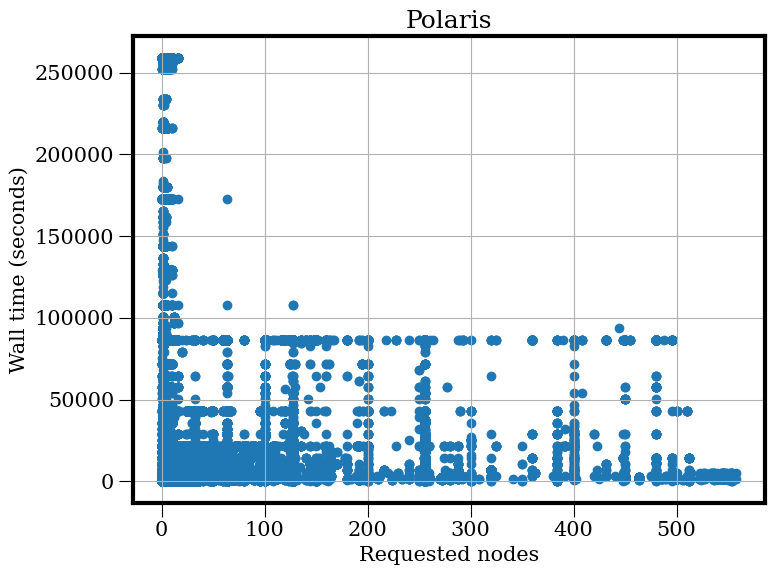

In [17]:
data_exploration.nodes_vs_walltime(df, machine_name)